# SARIMA


In [3]:
# from arch.unitroot import ADF 
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [33]:
# Import Libraries

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch.unitroot import ADF 
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")   


import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 5 Time Series Analysis\04 Live Data Sets")

In [4]:
# Read in the data
cropdata = pd.read_csv("CROP DATA.csv")
print("✅ Dataset Loaded Successfully")
print(cropdata.head())

✅ Dataset Loaded Successfully
   Year  Quarter  CROPYIELD
0  1947        1   2182.681
1  1947        2   2176.892
2  1947        3   2172.432
3  1947        4   2206.452
4  1948        1   2239.682


In [5]:
cropdata

,Year,Quarter,CROPYIELD
0,1947,1,2182.681
1,1947,2,2176.892
2,1947,3,2172.432
3,1947,4,2206.452
4,1948,1,2239.682
...,...,...,...
303,2022,4,21989.981
304,2023,1,22112.329
305,2023,2,22225.350
306,2023,3,22490.692


In [6]:
cropdata['CROPYIELD'].mean()

9968.193418831168

#### Define the time series

In [17]:
rng = pd.date_range('1947','2024',freq='Q') #end = 2024 has to be +1 year since it is exclusive
s = cropdata.CROPYIELD.values
yieldseries = pd.Series(s, rng)
print("Yield Series:\n", yieldseries.head())

Yield Series:
 1947-03-31    2182.681
1947-06-30    2176.892
1947-09-30    2172.432
1947-12-31    2206.452
1948-03-31    2239.682
Freq: QE-DEC, dtype: float64


#### Step 1: Stationarity Checking

<Axes: title={'center': 'Crop Yield Over Time'}>

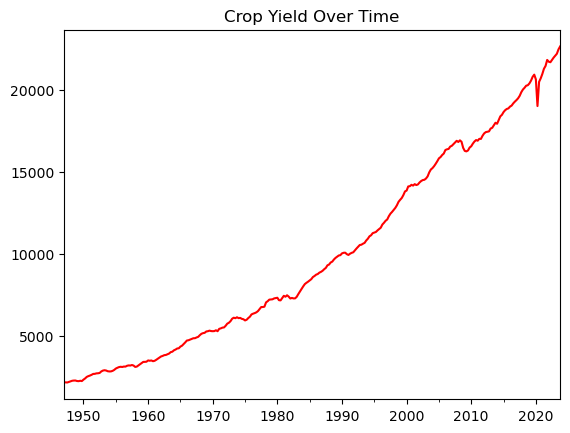

In [10]:
yieldseries.plot(color='red', title ="Crop Yield Over Time")

#### Correlogram

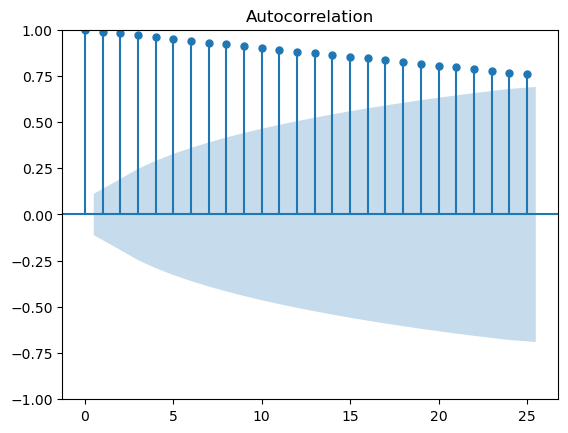

In [18]:
plot_acf(yieldseries)
plt.show()

##### Inference:

We can see a very slow decay. Hence, it’s a sign of non-stationary

### Dickey Fuller Test

In [19]:
adf = ADF(yieldseries,lags=0,trend='n')
adf.summary()

Test Statistic,8.268
P-value,1.000
Lags,0


Inference:
The value of the test statistic is: 8.268. Which is greater than 5% critical value. Hence, Time series is non-stationary.

In [20]:
# Differencing the series to make it stationary

diffs = ndiffs(yieldseries)
print("Number of differences needed:", diffs)

Number of differences needed: 2


<Axes: title={'center': 'Differenced Series (2nd Order)'}>

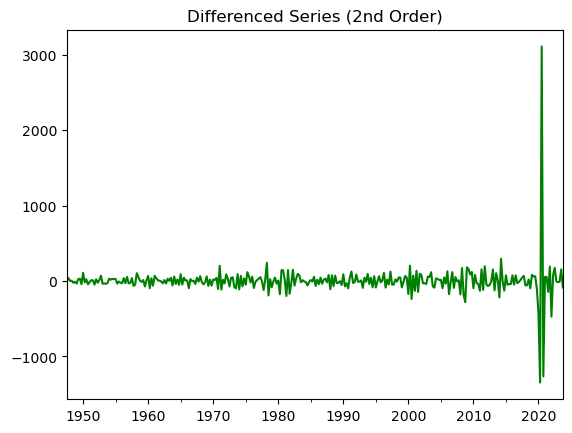

In [24]:
yielddiff = diff(yieldseries)
yielddiff2 = diff(yielddiff)
yielddiff2.plot(color='green', title="Differenced Series (2nd Order)")

In [25]:
# Checking whether stationarity is achieved after differencing

adf = ADF(yielddiff2,lags=0,trend='n')
adf.summary()

Test Statistic,-32.438
P-value,0.000
Lags,0


In [ ]:
# Inference:
# The value of the test statistic is: -32.438, which is less than 5% critical value. Hence, Time series is stationary. Reject H0. Second difference time series is stationary.

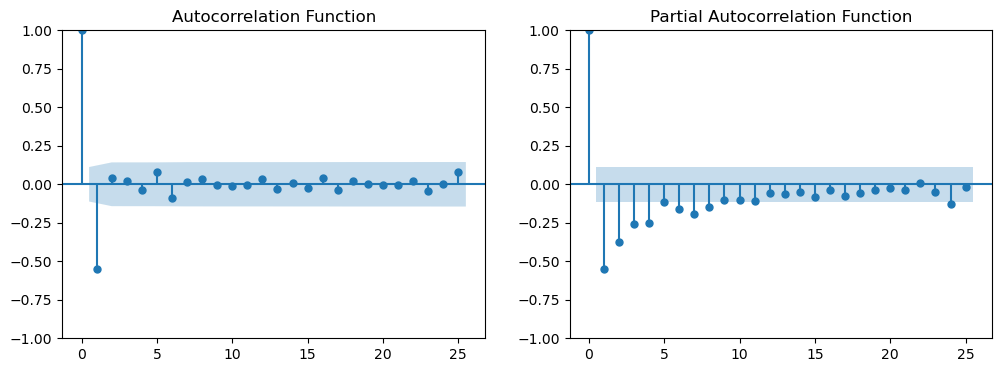

In [26]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(yielddiff2, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# PACF plot
plot_pacf(yielddiff2, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.show()

#### Note:

###### The acf and pacf plots indicate p=1 and q=2. It is recommended to set max.p and max.q to higher values. In this case we will set both to 2. max.P and max.Q can be set to 1 with D=1

### Step 3: Parameter Estimation

# SARIMA Model

### Note:
##### The acf and pacf plots indicate p=1 and q=2. It is recommended to set max.p and max.q to higher values. In this case we will set both to 2. max.P and max.Q can be set to 1 with D=1

In [27]:

model = pm.auto_arima(yieldseries, max_p=2, max_q=2, d=2,seasonal=True,max_P=1,max_Q=1,D=1,m = 4,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,1,1)[4]             : AIC=inf, Time=0.68 sec
 ARIMA(0,2,0)(0,1,0)[4]             : AIC=4353.841, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[4]             : AIC=4132.999, Time=0.09 sec
 ARIMA(0,2,1)(0,1,1)[4]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,0)(0,1,0)[4]             : AIC=4232.919, Time=0.04 sec
 ARIMA(1,2,0)(1,1,1)[4]             : AIC=inf, Time=0.21 sec
 ARIMA(1,2,0)(0,1,1)[4]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(1,1,0)[4]             : AIC=4253.783, Time=0.04 sec
 ARIMA(2,2,0)(1,1,0)[4]             : AIC=4091.198, Time=0.14 sec
 ARIMA(2,2,0)(0,1,0)[4]             : AIC=4180.307, Time=0.04 sec
 ARIMA(2,2,0)(1,1,1)[4]             : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,1,1)[4]             : AIC=inf, Time=0.20 sec
 ARIMA(2,2,1)(1,1,0)[4]             : AIC=inf, Time=0.31 sec
 ARIMA(1,2,1)(1,1,0)[4]             : AIC=inf, Time=0.19 sec
 ARIMA(2,2,0)(1,1,0)[4] intercept   : AIC=4093.198, Time=0.23 sec

Best m

In [30]:
model.params()

ar.L1         -0.789224
ar.L2         -0.366854
ar.S.L4       -0.511277
sigma2     43268.147249
dtype: float64

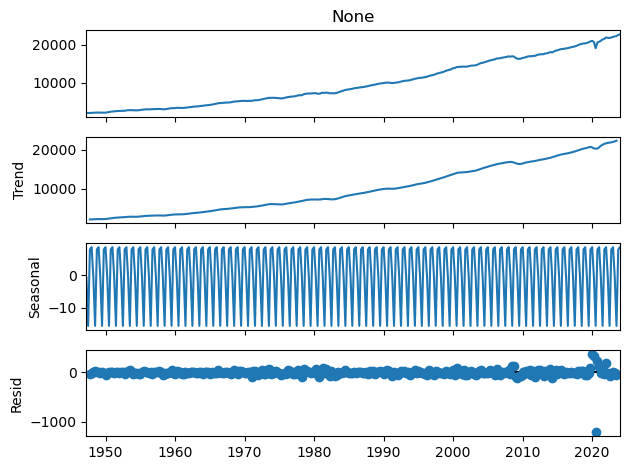

In [34]:
sm.tsa.seasonal_decompose(yieldseries).plot()
plt.show()  

In [35]:
model.aic()

4091.1979398649564

#### Step 4: Diagnostic Checking

In [36]:
resi = pd.Series(model.resid(),rng)
acorr_ljungbox(resi, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,11.270807,7.873548e-04,11.161735,8.350179e-04
2,15.114026,5.224335e-04,14.955363,5.655671e-04
3,19.980335,1.713427e-04,19.743184,1.918660e-04
4,32.732989,1.354671e-06,32.249013,1.701508e-06
5,40.140976,1.398733e-07,39.489722,1.892422e-07
6,40.871313,3.069692e-07,40.201212,4.158646e-07
7,41.783907,5.722634e-07,41.087311,7.789389e-07
8,57.590129,1.381153e-09,56.383655,2.374862e-09
9,57.999235,3.251354e-09,56.778245,5.572369e-09
10,59.412935,4.679848e-09,58.137220,8.145345e-09


<Axes: >

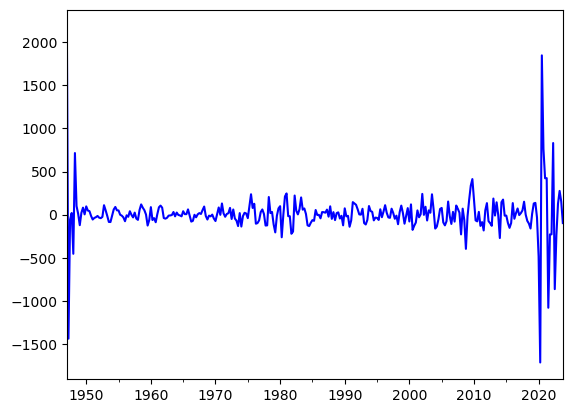

In [37]:
resi.plot(color = 'blue')

Note:
Based on the Box-Pierce test result and the small p-value, it is likely that the residuals are not white noise, and there is evidence of autocorrelation in the model residuals. However, the white noise test is influenced by year 2020. Therefore, we have performed white noise test on recent 3 years residuals. In recent 3 years the residuals are:

In [38]:
resi_21_23 = pd.Series(model.resid(), index=rng)

# Filter out the years 2021 to 2023
residuals = resi_21_23[resi_21_23.index.year.isin(range(2021, 2024))]
acorr_ljungbox(residuals, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.687737,0.406935,0.540365,0.462282
2,1.583294,0.453098,1.180048,0.554314


### Step 5: Forecasting

Making prediction for 1 year


In [39]:
model.predict(4)

2024-03-31    22689.402541
2024-06-30    22739.440206
2024-09-30    22923.423768
2024-12-31    23087.972540
Freq: QE-DEC, dtype: float64

Inference:
Forecasted values for CropYeild 2024 - quarters are:
Qtr1: 22689.402 Qtr2: 22739.44 Qtr3: 22923.42 Qtr4: 23087.97